# BIG DATA PROJECT

In this project we will analyse and interpret the given sms messages with respect to their property.
An sms could be spam or ham , first we must foresee its features to understand the conditions of being a spam message.
Then we must implement various classification methods on raw data.After classification we need to implement comparation of analysis performances.In the end we can reach the conlusion with the light of the previous steps.



## 1 Import Section

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score ,precision_score , f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from collections import Counter 

import nltk
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

import os

## 2 Data Preparitions

In [2]:
data = pd.read_csv('./spam.csv', encoding='latin-1')
data.head(n=10)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


### 2.1 DATA CLEARING

We will clear our data from punctions and stop words in english.

In [3]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
def remove_punctuation_and_stopwords(sms):
    
    sms_no_punctuation = [ch for ch in sms if ch not in string.punctuation]
    sms_no_punctuation = "".join(sms_no_punctuation).split()
    
    sms_no_punctuation_no_stopwords = \
        [word.lower() for word in sms_no_punctuation if word.lower() not in stopwords.words("english")]
        
    return sms_no_punctuation_no_stopwords

## 3 Explotary Data Analysis

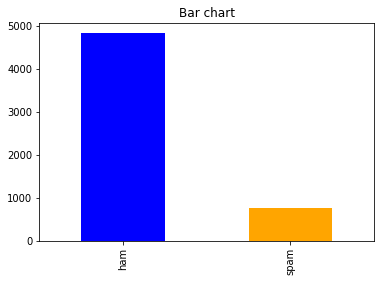

In [5]:
count_Class=pd.value_counts(data["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [6]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [7]:
data.groupby("label").describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [8]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
data['spam'] = data['label'].map( {'spam': 1, 'ham': 0} ).astype(int)
data.head(10)

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [10]:
data.describe()

,spam
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


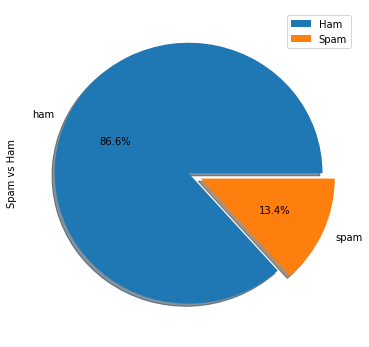

In [11]:
data["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

## 4 Data Feature Analysis

Now we will analyze our data with 5 different features to gain an insight.

### 4.1 Text Length

In [12]:
data['length'] = data['text'].apply(len)
data.head(20)

,label,text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148
6,ham,Even my brother is not like to speak with me. ...,0,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160
8,spam,WINNER!! As a valued network customer you have...,1,158
9,spam,Had your mobile 11 months or more? U R entitle...,1,154


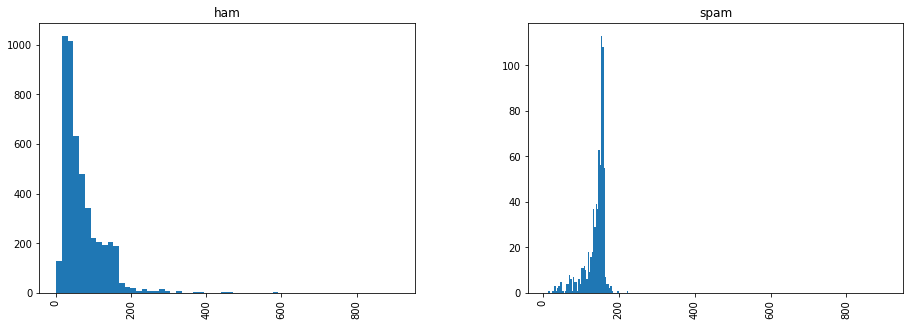

In [13]:
data.hist(column='length',by='label',bins=60,figsize=(15,5));
plt.xlim(-40,950);


### 4.2 Most Used Stop Words

In [14]:


def has_StopWords(sms):
    sms_split = sms.split()
    count = 0
    for word in sms_split:
        if word in stopwords.words("english"):
            count = count + 1;
    
    return count;

data['Count Of Stop Word'] = data['text'].apply(has_StopWords)
data.head(10)

,label,text,spam,length,Count Of Stop Word
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,4
1,ham,Ok lar... Joking wif u oni...,0,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,5
3,ham,U dun say so early hor... U c already then say...,0,49,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,5
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148,13
6,ham,Even my brother is not like to speak with me. ...,0,77,6
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160,9
8,spam,WINNER!! As a valued network customer you have...,1,158,5
9,spam,Had your mobile 11 months or more? U R entitle...,1,154,8


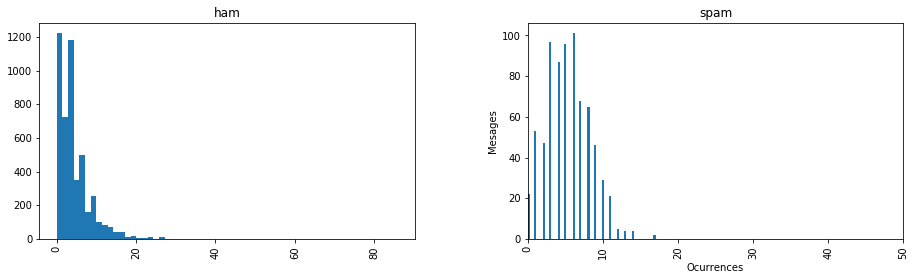

In [15]:
data.hist(column='Count Of Stop Word',by='label',bins=60,figsize=(15,4));
plt.xlabel("Ocurrences")
plt.ylabel("Mesages")
plt.xlim(0,50);



### 4.3 Spam Or Ham Ration Of Messages Includes Full Capital Words

In [16]:

def has_CapsWord(sms):
    sms_split = sms.split()
    count = 0
    for word in sms_split:
        if word.isupper() :
            count = count + 1;
    
    return count;

data['Count OF Full Capital'] = data['text'].apply(has_CapsWord)
data.head(10)

,label,text,spam,length,Count Of Stop Word,Count OF Full Capital
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,4,0
1,ham,Ok lar... Joking wif u oni...,0,29,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,5,2
3,ham,U dun say so early hor... U c already then say...,0,49,2,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,5,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148,13,0
6,ham,Even my brother is not like to speak with me. ...,0,77,6,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160,9,0
8,spam,WINNER!! As a valued network customer you have...,1,158,5,2
9,spam,Had your mobile 11 months or more? U R entitle...,1,154,8,3


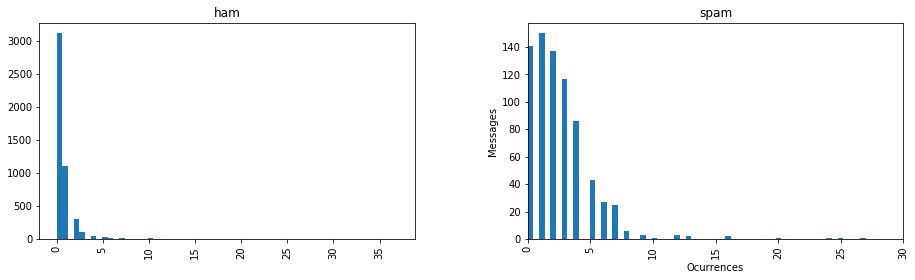

In [17]:
data.hist(column='Count OF Full Capital',by='label',bins=60,figsize=(15,4));
plt.xlabel("Ocurrences")
plt.ylabel("Messages")
plt.xlim(0,30);


### 4.4 Digit Number

In [18]:
def digit_num(sms):
    count = 0
    count = sum(c.isdigit() for c in sms)
    return count;

data['digit_num'] = data['text'].apply(digit_num)


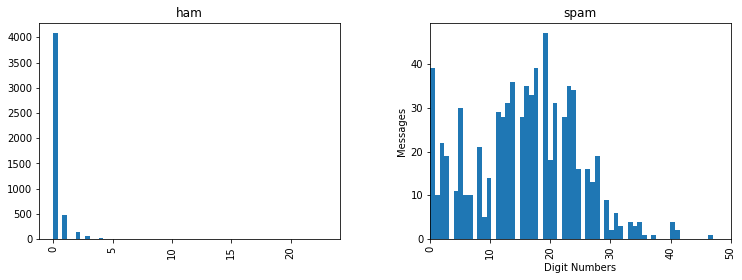

In [19]:
data.hist(column='digit_num',by='label',bins=60,figsize=(12,4));
plt.xlabel("Digit Numbers")
plt.ylabel("Messages")
plt.xlim(0,50);

Maximum Digit Number In A Text

In [20]:
print(max(data['digit_num'] ))

47


### 4.5 Words Count In Messages

In [21]:
def word_count(dataSet):
    split_data = dataSet.split()
    count = 0
    for word in split_data:
            count = count + 1;
    return count;

In [22]:
data['Count Of Words'] = data['text'].apply(word_count)
data.head(10)

,label,text,spam,length,Count Of Stop Word,Count OF Full Capital,digit_num,Count Of Words
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,4,0,0,20
1,ham,Ok lar... Joking wif u oni...,0,29,0,0,0,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,5,2,25,28
3,ham,U dun say so early hor... U c already then say...,0,49,2,2,0,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,5,1,0,13
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148,13,0,4,32
6,ham,Even my brother is not like to speak with me. ...,0,77,6,0,0,16
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160,9,0,1,26
8,spam,WINNER!! As a valued network customer you have...,1,158,5,2,19,26
9,spam,Had your mobile 11 months or more? U R entitle...,1,154,8,3,13,29


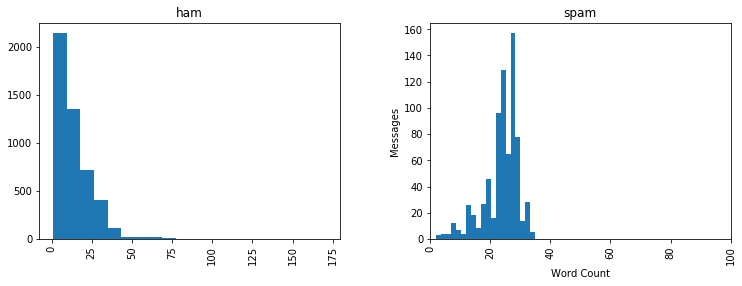

In [23]:
data.hist(column='Count Of Words',by='label',bins=20,figsize=(12,4));
plt.xlabel("Word Count")
plt.ylabel("Messages")
plt.xlim(0,100);

## Text Vectorization


### Count Vectorizer

bow = bag of words

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = remove_punctuation_and_stopwords).fit(data['text'])

Counted Different Words :

In [25]:
print(len(bow_transformer.vocabulary_))

9431


#### Example
Single use of vectorizations to understand how it works.

In [26]:
sample_spam = data['text'][9]
bow_sample_spam = bow_transformer.transform([sample_spam])
print(sample_spam)
print(bow_sample_spam)

Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
  (0, 57)	1
  (0, 313)	1
  (0, 1906)	1
  (0, 1942)	1
  (0, 2234)	1
  (0, 2268)	1
  (0, 3120)	1
  (0, 3539)	2
  (0, 4859)	1
  (0, 5470)	2
  (0, 5471)	1
  (0, 5515)	1
  (0, 6679)	1
  (0, 8534)	1
  (0, 8621)	2


//(choosen message id,token number)  occurence

In [27]:
rows, cols = bow_sample_spam.nonzero()
for col in cols: 
    print(bow_transformer.get_feature_names()[col])


08002986030
11
call
camera
co
colour
entitled
free
latest
mobile
mobiles
months
r
u
update


// vectorized words

#### Applying bow_transformer on all messages


In [28]:
bow_data = bow_transformer.transform(data['text'])
print(bow_data.shape)

(5572, 9431)


In [29]:
bow_data 

<5572x9431 sparse matrix of type '<type 'numpy.int64'>'
	with 49772 stored elements in Compressed Sparse Row format>

(row , columns) on matrix

In [30]:
bow_data.nnz

49772

number of none zero entries

### TFIDIF

Term Frequency times Inverse Document Frequency

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(bow_data)

An example of TFIDIF , we will use previously defined spam example

In [32]:
tfidf_sample_spam = tfidf_transformer.transform(bow_sample_spam)
print(tfidf_sample_spam)

  (0, 8621)	0.4613515016782055
  (0, 8534)	0.10158633542920732
  (0, 6679)	0.16246850894146037
  (0, 5515)	0.24654148975832296
  (0, 5471)	0.24377794817235118
  (0, 5470)	0.33126679094840594
  (0, 4859)	0.20674426333259252
  (0, 3539)	0.2906791361988477
  (0, 3120)	0.25647395448704785
  (0, 2268)	0.22561414298808383
  (0, 2234)	0.26054051253610827
  (0, 1942)	0.2116151202102985
  (0, 1906)	0.1153699748612914
  (0, 313)	0.25283629435531674
  (0, 57)	0.29440446477134335


(choosen message id,token number) occurence probalitity

#### Applying tfidf_transformer on all messages

In [33]:
data_tfidf = tfidf_transformer.transform(bow_data)

In [34]:
data_tfidf

<5572x9431 sparse matrix of type '<type 'numpy.float64'>'
	with 49772 stored elements in Compressed Sparse Row format>

##  Classifiers

**Parameter Tuning =** We will use *Cross Validation* method and *Manual Parameter Search* for optimal parameters at every classification after analysis.

In [35]:
sms_train, sms_test, label_train, label_test = \
    train_test_split(data["text"], data["spam"], test_size=0.3, random_state=5)

In [36]:
sms_train.head(10)

3507    Camera quite good, 10.1mega pixels, 3optical a...
1332            It's ok lar. U sleep early too... Nite...
4259        Are you plans with your family set in stone ?
1236                             How much are we getting?
2132    Your B4U voucher w/c 27/03 is MARSMS. Log onto...
165     I place all ur points on e cultures module alr...
2714    I am thinking of going down to reg for pract l...
1624    500 free text msgs. Just text ok to 80488 and ...
359     Hello! Just got here, st andrews-boy its a lon...
2994    Mm not entirely sure i understood that text bu...
Name: text, dtype: object

In [37]:
label_train.head(10)

3507    0
1332    0
4259    0
1236    0
2132    1
165     0
2714    0
1624    1
359     0
2994    0
Name: spam, dtype: int32

In [38]:
bow_transformer

CountVectorizer(analyzer=<function remove_punctuation_and_stopwords at 0x000000000E352358>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None,
        vocabulary=None)

### Multinominal Naive Bayes

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. 

In [39]:
analyzer = remove_punctuation_and_stopwords
pipe_MNB = Pipeline([ ('bow', CountVectorizer(analyzer)),('tfidf' , TfidfTransformer()),('clf_MNB' , MultinomialNB(0.5))])                 
pipe_MNB.fit(X=sms_train, y=label_train)
print(pipe_MNB.score(sms_test, label_test))
mnb = pipe_MNB.score(sms_test, label_test)


0.9784688995215312


In [40]:
#Manual Parameter Search
analyzer = remove_punctuation_and_stopwords

list_C = np.linspace(0.05, 1, num=20)
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    pipe_MNB = Pipeline([ ('bow', CountVectorizer(analyzer)),('tfidf' , TfidfTransformer()),
                         ('clf_MNB' , MultinomialNB(alpha=C))])  
    pipe_MNB.fit(X=sms_train, y=label_train)
    score_train[count] = pipe_MNB.score(sms_train, label_train)
    score_test[count]= pipe_MNB.score(sms_test, label_test)
    recall_test[count] = metrics.recall_score(label_test, pipe_MNB.predict(sms_test))
    precision_test[count] = metrics.precision_score(label_test, pipe_MNB.predict(sms_test))
    count = count + 1 

In [41]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['Alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,Alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.05,0.998462,0.989833,0.922705,0.994792
1,0.10,0.997949,0.986842,0.898551,0.994652
2,0.15,0.997179,0.986244,0.893720,0.994624
3,0.20,0.996154,0.985646,0.888889,0.994595
4,0.25,0.995128,0.984450,0.874396,1.000000
5,0.30,0.994103,0.983852,0.869565,1.000000
6,0.35,0.992308,0.983852,0.869565,1.000000
7,0.40,0.990769,0.982057,0.855072,1.000000
8,0.45,0.989744,0.979665,0.835749,1.000000
9,0.50,0.988462,0.978469,0.826087,1.000000


I will get the best with respect to "Accuracy" result now:

In [42]:
best_index = models['Test Accuracy'].idxmax()
models.iloc[best_index, :]

Alpha             0.050000
Train Accuracy    0.998462
Test Accuracy     0.989833
Test Recall       0.922705
Test Precision    0.994792
Name: 0, dtype: float64

#### Cross Validation

In [43]:
pipe_MNB = Pipeline([ ('bow', CountVectorizer(analyzer)),('tfidf' , TfidfTransformer()),('clf_MNB' , MultinomialNB(0.05))])                 
score_mnb = cross_val_score(pipe_MNB, sms_test, label_test, cv=5)
score_mnb 


array([0.9761194 , 0.97910448, 0.96706587, 0.99101796, 0.98203593])

In [44]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score_mnb.mean(), score_mnb.std() * 2))

Accuracy: 0.98 (+/- 0.02)


### K-Nearest Neighboor

In [45]:
analyzer = remove_punctuation_and_stopwords
pipe_KNN = Pipeline([ ('bow'  , CountVectorizer(analyzer) ),('tfidf',TfidfTransformer()),('clf_KNN',KNeighborsClassifier(n_neighbors=10))])
pipe_KNN.fit(X=sms_train, y=label_train)
print(pipe_KNN.score(sms_test, label_test))
knn = pipe_KNN.score(sms_test, label_test)

0.9491626794258373


In [46]:
analyzer = remove_punctuation_and_stopwords

list_C = np.arange(5, 50, 5)
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    pipe_KNN = Pipeline([ ('bow'  , CountVectorizer(analyzer) ), ('tfidf',TfidfTransformer()),
                    ('clf_KNN',KNeighborsClassifier(n_neighbors=C))])
    pipe_KNN.fit(X=sms_train, y=label_train)
    score_train[count] = pipe_KNN.score(sms_train, label_train)
    score_test[count]= pipe_KNN.score(sms_test, label_test)
    recall_test[count] = metrics.recall_score(label_test, pipe_KNN.predict(sms_test))
    precision_test[count] = metrics.precision_score(label_test, pipe_KNN.predict(sms_test))
    count = count + 1 

In [47]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['Neigbor', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,Neigbor,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,5.0,0.911538,0.916866,0.328502,1.0
1,10.0,0.943590,0.949163,0.589372,1.0
2,15.0,0.956923,0.959928,0.676329,1.0
3,20.0,0.957179,0.962321,0.695652,1.0
4,25.0,0.958462,0.964713,0.714976,1.0
5,30.0,0.956154,0.958134,0.661836,1.0
6,35.0,0.955641,0.962321,0.695652,1.0
7,40.0,0.952564,0.958732,0.666667,1.0
8,45.0,0.951538,0.958134,0.661836,1.0


I will get the best with respect to "Accuracy" result now:

In [48]:
best_index = models['Test Accuracy'].idxmax()
models.iloc[best_index, :]

Neigbor           25.000000
Train Accuracy     0.958462
Test Accuracy      0.964713
Test Recall        0.714976
Test Precision     1.000000
Name: 4, dtype: float64

#### Cross Validation

In [49]:
pipe_KNN = Pipeline([ ('bow'  , CountVectorizer(analyzer) ),('tfidf',TfidfTransformer()),('clf_KNN',KNeighborsClassifier(n_neighbors=5))])
score_knn = cross_val_score(pipe_MNB, sms_test, label_test, cv=5)
score_knn 

array([0.9761194 , 0.97910448, 0.96706587, 0.99101796, 0.98203593])

In [50]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2))

Accuracy: 0.98 (+/- 0.02)


### Support Vector Classification

The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. 
For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly

In [51]:

analyzer = remove_punctuation_and_stopwords

pipe_SVC = Pipeline([ ('bow', CountVectorizer(analyzer)),('tfidf' , TfidfTransformer()),
                     ('clf_SVC', SVC(gamma='auto', C=1000))])
pipe_SVC.fit(X=sms_train, y=label_train)
print(pipe_SVC.score(sms_test, label_test))
svc = pipe_SVC.score(sms_test, label_test)



0.9796650717703349


We have tested SVC with c = 1000 , now we need to test other configurations to get optimal precision

In [52]:

analyzer = remove_punctuation_and_stopwords


list_C = np.arange(500, 2000, 100)
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    pipe_SVC = Pipeline([ ('bow', CountVectorizer(analyzer)),('tfidf' , TfidfTransformer()),
                     ('clf_SVC', SVC(gamma='auto', C=C))])
    pipe_SVC.fit(X=sms_train, y=label_train)
    score_train[count] = pipe_SVC.score(sms_train, label_train)
    score_test[count]= pipe_SVC.score(sms_test, label_test)
    recall_test[count] = metrics.recall_score(label_test, pipe_SVC.predict(sms_test))
    precision_test[count] = metrics.precision_score(label_test, pipe_SVC.predict(sms_test))
    count = count + 1
    


In [53]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=16)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,0.961026,0.966507,0.734300,0.993464
1,600.0,0.969744,0.973684,0.792271,0.993939
2,700.0,0.973846,0.976675,0.816425,0.994118
3,800.0,0.975641,0.977871,0.826087,0.994186
4,900.0,0.977949,0.978469,0.830918,0.994220
5,1000.0,0.979231,0.979665,0.840580,0.994286
6,1100.0,0.980000,0.979665,0.840580,0.994286
7,1200.0,0.981282,0.980263,0.845411,0.994318
8,1300.0,0.982821,0.982656,0.864734,0.994444
9,1400.0,0.983077,0.985048,0.884058,0.994565


I will get the best with respect to "Accuracy" result now:

In [54]:
best_index = models['Test Accuracy'].idxmax()
models.iloc[best_index, :]

C                 1900.000000
Train Accuracy       0.989231
Test Accuracy        0.987440
Test Recall          0.903382
Test Precision       0.994681
Name: 14, dtype: float64

#### Cross Validation

In [55]:
pipe_SVC = Pipeline([ ('bow', CountVectorizer(analyzer)),('tfidf' , TfidfTransformer()),
                     ('clf_SVC', SVC(gamma='auto', C=1900))])
score_svc = cross_val_score(pipe_SVC, sms_test, label_test, cv=5)
score_svc 

array([0.9880597 , 0.98507463, 0.96706587, 0.99101796, 0.98203593])

In [56]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score_svc.mean(), score_svc.std() * 2))

Accuracy: 0.98 (+/- 0.02)


### Logistic Regression

In [57]:

analyzer = remove_punctuation_and_stopwords

pipe_LR = Pipeline([ ('bow', CountVectorizer(analyzer)),('tfidf' , TfidfTransformer()),
                     ('clf_LR', LogisticRegression(random_state=1))])
pipe_LR.fit(X=sms_train, y=label_train)
print(pipe_LR.score(sms_test, label_test))
lr = pipe_LR.score(sms_test, label_test)

0.9742822966507177


E:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:

analyzer = remove_punctuation_and_stopwords


list_C = np.arange(1, 20, 1)
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    pipe_LR = Pipeline([ ('bow', CountVectorizer(analyzer)),('tfidf' , TfidfTransformer()),
                     ('clf_LR', LogisticRegression(random_state=C))])
    pipe_LR.fit(X=sms_train, y=label_train)
    score_train[count] = pipe_LR.score(sms_train, label_train)
    score_test[count]= pipe_LR.score(sms_test, label_test)
    recall_test[count] = metrics.recall_score(label_test, pipe_LR.predict(sms_test))
    precision_test[count] = metrics.precision_score(label_test, pipe_LR.predict(sms_test))
    count = count + 1 

In [59]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['Random State', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=16)

,Random State,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,1.0,0.973077,0.974282,0.797101,0.993976
1,2.0,0.973077,0.974282,0.797101,0.993976
2,3.0,0.973077,0.974282,0.797101,0.993976
3,4.0,0.973077,0.974282,0.797101,0.993976
4,5.0,0.973077,0.974282,0.797101,0.993976
5,6.0,0.973077,0.974282,0.797101,0.993976
6,7.0,0.973077,0.974282,0.797101,0.993976
7,8.0,0.973077,0.974282,0.797101,0.993976
8,9.0,0.973077,0.974282,0.797101,0.993976
9,10.0,0.973077,0.974282,0.797101,0.993976


I will get the best with respect to "Accuracy" result now:

In [60]:
best_index = models['Test Accuracy'].idxmax()
models.iloc[best_index, :]

Random State      1.000000
Train Accuracy    0.973077
Test Accuracy     0.974282
Test Recall       0.797101
Test Precision    0.993976
Name: 0, dtype: float64

#### Cross Validation

In [61]:
pipe_LR = Pipeline([ ('bow', CountVectorizer(analyzer)),('tfidf' , TfidfTransformer()),
                     ('clf_LR', LogisticRegression(random_state=1))])
score_lrc = cross_val_score(pipe_LR, sms_test, label_test, cv=5)
score_lrc 

array([0.94029851, 0.92835821, 0.91317365, 0.9491018 , 0.94311377])

In [62]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score_lrc.mean(), score_lrc.std() * 2))

Accuracy: 0.93 (+/- 0.03)


### Decision Tree Classifier

In [63]:

analyzer = remove_punctuation_and_stopwords

pipe_DTC = Pipeline([ ('bow', CountVectorizer(analyzer)),('tfidf' , TfidfTransformer()),
                     ('clf_LR', DecisionTreeClassifier(random_state=1))])
pipe_DTC.fit(X=sms_train, y=label_train)
print(pipe_DTC.score(sms_test, label_test))
dtc = pipe_DTC.score(sms_test, label_test)

0.9700956937799043


In [64]:

analyzer = remove_punctuation_and_stopwords


list_C = np.arange(1, 20, 1)
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    pipe_DTC = Pipeline([ ('bow', CountVectorizer(analyzer)),('tfidf' , TfidfTransformer()),
                     ('clf_LR', DecisionTreeClassifier(random_state=C))])
    pipe_DTC.fit(X=sms_train, y=label_train)
    score_train[count] = pipe_DTC.score(sms_train, label_train)
    score_test[count]= pipe_DTC.score(sms_test, label_test)
    recall_test[count] = metrics.recall_score(label_test, pipe_DTC.predict(sms_test))
    precision_test[count] = metrics.precision_score(label_test, pipe_DTC.predict(sms_test))
    count = count + 1 

In [65]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['Random State', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=20)

,Random State,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,1.0,1.0,0.970096,0.869565,0.886700
1,2.0,1.0,0.965909,0.855072,0.867647
2,3.0,1.0,0.967105,0.869565,0.865385
3,4.0,1.0,0.970096,0.869565,0.886700
4,5.0,1.0,0.965311,0.855072,0.863415
5,6.0,1.0,0.964115,0.864734,0.848341
6,7.0,1.0,0.969498,0.859903,0.890000
7,8.0,1.0,0.965909,0.850242,0.871287
8,9.0,1.0,0.965909,0.850242,0.871287
9,10.0,1.0,0.965311,0.855072,0.863415


I will get the best with respect to "Accuracy" result now:

In [66]:
best_index = models['Test Accuracy'].idxmax()
models.iloc[best_index, :]

Random State      1.000000
Train Accuracy    1.000000
Test Accuracy     0.970096
Test Recall       0.869565
Test Precision    0.886700
Name: 0, dtype: float64

#### Cross Validation

In [67]:
pipe_DTC = Pipeline([ ('bow', CountVectorizer(analyzer)),('tfidf' , TfidfTransformer()),
                     ('clf_LR', DecisionTreeClassifier(random_state=1))])
score_dtc = cross_val_score(pipe_DTC, sms_test, label_test, cv=5)
score_dtc 

array([0.95223881, 0.96716418, 0.95508982, 0.96407186, 0.9491018 ])

In [68]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score_dtc.mean(), score_dtc.std() * 2))

Accuracy: 0.96 (+/- 0.01)


## Ensemble Classifiers

We have found optimals on classification section.Now we will use these optimal parameters.

In [69]:
svc = SVC(gamma="auto",C=1900)
knc = KNeighborsClassifier(n_neighbors=25)
mnb = MultinomialNB(alpha=0.05)
dtc = DecisionTreeClassifier(random_state=1)
lrc = LogisticRegression(random_state=1)


model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
pipe_Model = Pipeline([ ('bow', CountVectorizer(analyzer)),('tfidf' , TfidfTransformer()),
                     ('clf_Model', VotingClassifier(estimators=[("lr", lrc), ("dt", dtc), ("svc",svc),("knc",knc),("mnb",mnb)], voting='hard'))])
pipe_Model.fit(X=sms_train, y=label_train)
pipe_Model.score(sms_test,label_test)

0.9838516746411483

#### Cross Validation

In [70]:
score_ensemble = cross_val_score(pipe_Model, sms_test, label_test, cv=5)
score_ensemble 

array([0.97313433, 0.98208955, 0.95508982, 0.98502994, 0.97005988])

In [71]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score_ensemble.mean(), score_ensemble.std() * 2))

Accuracy: 0.97 (+/- 0.02)


## Comparative Performance

### Confusion Matrix

MultinomialNB
KNeighborsClassifier 
LogisticRegression
DecisionTreeClassifier 
SVC

### Accuracy Score

classification accuracy = correct predictions / total predictions = (TP + TN) / (TP + TN + FP + FN)

### Precision Score

precision ration = TP / (TP + FP)

### F-Measure


------------------------------------------------------------------------------------------------------------------------------

### Confusion Matrix

TN FP

FN TP

In [72]:
def plot_confusion_matrix(cm):
    sns.heatmap(cm, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", square=True, cbar=False)  
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [73]:
pred_array = []
pred_names=["MNB","KNN","SVC","LRC","DTC"]
accuracy_array = []
precision_array = []
f1_array = []


#### MNB

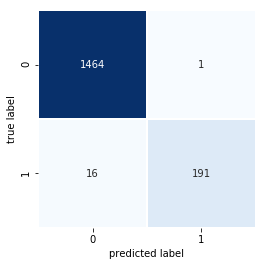

In [74]:
pipe_MNB.fit(X=sms_train, y=label_train)
mnb_pred = pipe_MNB.predict(sms_test)
cm = confusion_matrix(label_test, mnb_pred)
plot_confusion_matrix(cm)
pred_array.append(mnb_pred)


#### KNN

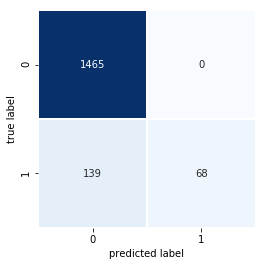

In [75]:
pipe_KNN.fit(X=sms_train, y=label_train)
knn_pred = pipe_KNN.predict(sms_test)
cm = confusion_matrix(label_test, knn_pred)
plot_confusion_matrix(cm)
pred_array.append(knn_pred)

#### SVC

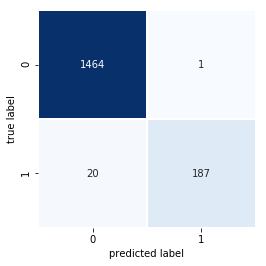

In [76]:
pipe_SVC.fit(X=sms_train, y=label_train)
svc_pred = pipe_SVC.predict(sms_test)
cm = confusion_matrix(label_test, svc_pred)
plot_confusion_matrix(cm)
pred_array.append(svc_pred)

#### LRC

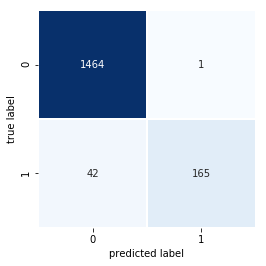

In [77]:
pipe_LR.fit(X=sms_train, y=label_train)
lrc_pred = pipe_LR.predict(sms_test)
cm = confusion_matrix(label_test, lrc_pred)
plot_confusion_matrix(cm)
pred_array.append(lrc_pred)

#### DTC

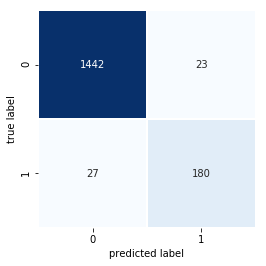

In [78]:
pipe_DTC.fit(X=sms_train, y=label_train)
dtc_pred = pipe_DTC.predict(sms_test)
cm = confusion_matrix(label_test, dtc_pred)
plot_confusion_matrix(cm)
pred_array.append(dtc_pred)

### Accuracy Score

classification accuracy = correct predictions / total predictions = (TP + TN) / (TP + TN + FP + FN)


In [79]:

i = 0
for pred in pred_array:
    accuracy_array.append(accuracy_score(label_test, pred))
    print(pred_names[i])
    print(accuracy_score(label_test, pred))
    
    i=i+1


MNB
0.9898325358851675
KNN
0.9168660287081339
SVC
0.9874401913875598
LRC
0.9742822966507177
DTC
0.9700956937799043


### Precision Score

precision = TP / (TP + FP)

In [80]:

i = 0
for pred in pred_array:
    print(pred_names[i])
    precision_array.append(precision_score(label_test, pred))
    print(precision_score(label_test, pred,average=None, labels=[0,1]))# label [0] ham , label [1] spam
    i=i+1

MNB
[0.98918919 0.99479167]
KNN
[0.91334165 1.        ]
SVC
[0.98652291 0.99468085]
LRC
[0.97211155 0.9939759 ]
DTC
[0.98162015 0.88669951]


### F-Measure

In [81]:

i = 0
for pred in pred_array:
    print(pred_names[i])
    f1_array.append(f1_score(label_test, pred))
    print(f1_score(label_test, pred,average=None, labels=[0,1]))# label [0] ham , label [1] spam
    i=i+1

MNB
[0.9942275  0.95739348]
KNN
[0.95470837 0.49454545]
SVC
[0.99287894 0.94683544]
LRC
[0.98552676 0.8847185 ]
DTC
[0.98295842 0.87804878]


## Conclusion

### Cross Validation Scores

In [82]:
class_scores = []
class_scores.append(score_mnb.mean())
class_scores.append(score_knn.mean())
class_scores.append(score_svc.mean())
class_scores.append(score_lrc.mean())
class_scores.append(score_dtc.mean())

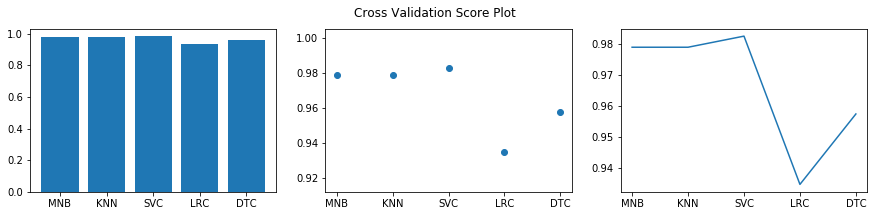

In [83]:
plt.figure(1, figsize=(15, 3))

plt.subplot(131)
plt.bar(pred_names, class_scores)
plt.subplot(132)
plt.scatter(pred_names, class_scores)
plt.subplot(133)
plt.plot(pred_names, class_scores)
plt.suptitle('Cross Validation Score Plot')
plt.show()

Cross Validation Accuracies gives us SVC as best but this result is bit illusional and we must look the results of our score comparisons to get final decision.

### Comparison Report

In [84]:

i = 0
for pred in pred_array:
    print(pred_names[i])
    print(classification_report(label_test, pred))
    i=i+1
    
# label [0] ham , label [1] spam

MNB
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1465
           1       0.99      0.92      0.96       207

   micro avg       0.99      0.99      0.99      1672
   macro avg       0.99      0.96      0.98      1672
weighted avg       0.99      0.99      0.99      1672

KNN
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1465
           1       1.00      0.33      0.49       207

   micro avg       0.92      0.92      0.92      1672
   macro avg       0.96      0.66      0.72      1672
weighted avg       0.92      0.92      0.90      1672

SVC
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1465
           1       0.99      0.90      0.95       207

   micro avg       0.99      0.99      0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.99      1672

LRC
   

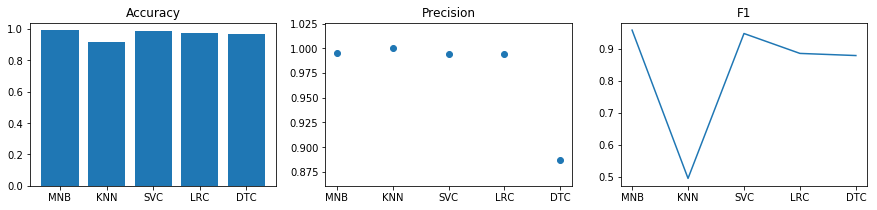

In [85]:
plt.figure(1, figsize=(15, 3))
#These Graphs are for spam calassification scores. 
plt.subplot(131)
plt.bar(pred_names, accuracy_array)
plt.title('Accuracy')
plt.subplot(132)
plt.scatter(pred_names, precision_array)
plt.title('Precision')
plt.subplot(133)
plt.plot(pred_names, f1_array)
plt.title('F1')
plt.show()


We can see **Multinomial Naive Bayes** classification is best for spam classification between tested classifications with help of the info we gathered via comparative performance analysis methods. 